* initialisation - to set the number of input, hidden and output nodes
* train - refine the weights after being given a training set example to learn from
* query - give an answer from the output nodes after being given an input

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special

In [26]:
#neural network class definition
class NeuralNet:
    
    def __init__(self, input_nodes,hidden_nodes, output_nodes, learning_rate):
        
        #number of nodes for input, hidden and output 
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        #learning rate
        self.lr = learning_rate
        
        #matrix of size (hidden_nodes by input_nodes)
        # can do (hidden_nodes by input_nodes+1 if bias is included)
        #xavier initialization
        
        self.w_ih = np.random.randn(hidden_nodes, input_nodes)*np.sqrt(1/(input_nodes))
        self.w_ho = np.random.randn(output_nodes, hidden_nodes)*np.sqrt(1/(hidden_nodes))
        
        print('hidden to input weights ',self.w_ih.shape,'\n\n', self.w_ih)
        print('hidden to output weights ',self.w_ho.shape,'\n\n', self.w_ho)
        print('\n\n')
        
        self.activate = lambda x: scipy.special.expit(x)
        
   
    #query takes in input and gives out output 
    # x_hidden = weights_hidden* i 
    #Ohidden = sigmoid( Xhidden )
    
    def query(self, inputs_list):
        
        #inputs
        inputs = np.array(inputs_list, ndmin=2).T
               
        #for hidden layer
        hidden_inputs = np.dot(self.w_ih, inputs)
        hidden_outputs = self.activate(hidden_inputs)
        
        #for final layer
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        final_outputs = self.activate(final_inputs)
        
        #print('final output ',final_outputs.shape,'\n\n',final_outputs)
        #print('\n\n')
        
        return final_outputs
    
    def train(self, inlist, tlist):
        
        #first output is calculated 
        #second compare the output get difference
        #update network weights backwards
        
        inputs = np.array(inlist, ndmin =2).T
        targets = np.array(tlist, ndmin=2).T
        
        print('inputs ',inputs.shape, '\n', inputs)
        print('targets ',targets.shape,'\n', targets)
        #print('\n\n')
        
        hidden_inputs = np.dot(self.w_ih, inputs)
        hidden_outputs = self.activate(hidden_inputs)
        
        #print('hidden_inputs w_ih*input ',hidden_inputs.shape,'\n\n',hidden_inputs)
        #print('hidden_outputs ',hidden_outputs.shape,'\n\n', hidden_outputs)
        #print('\n\n')
        
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        final_outputs = self.activate(final_inputs)
        
        #print('''final_input w_ho*hidden_input''',final_inputs.shape,'\n\n', final_inputs)
        #print('final_output ',final_outputs.shape,'\n\n',final_outputs)
        #print('\n\n')
        
        # error = target-final outputs
        output_errors = targets-final_outputs
        
        #print('output_errors target-final_outputs ',output_errors.shape,'\n\n',output_errors)
        #print('\n\n')
        
        #hidden_error = weight.T*hidden_output*output_error
        hidden_errors = np.dot(self.w_ho.T,output_errors)
        
        #print('hidden_errors w_ho.T*output_errors', hidden_errors.shape,'\n\n',hidden_errors)
        #print('\n\n')
        
        #update weights
        #print('output errors', output_errors.shape, '\n', output_errors, '\n')
        #print('final_outputs',final_outputs.shape, '\n', final_outputs,'\n')
        #print('1-final_outputs','\n',1-final_outputs)
        #print('hidden_outputs',hidden_outputs.shape,'\n',hidden_outputs)
        #print('hidden_outputs transposed',np.transpose(hidden_outputs))
        
        self.w_ho += self.lr * np.dot((output_errors *final_outputs*(1.0 - final_outputs)),np.transpose(hidden_outputs))
        
        #print('self.w_ho',self.w_ho,'\n\n',self.w_ho)
        #print('\n\n')
        
        #print('self.w_ih',self.w_ih.shape,'\n\n',self.w_ih) 
        
        self.w_ih += self.lr * np.dot((hidden_errors * hidden_outputs*(1.0-hidden_inputs)),np.transpose(inputs))
        #print('self.w_ih',self.w_ih.shape,'\n\n',self.w_ih) 
        #print('\n\n')
        
 
    

* A matrix for the weights for links between the input and hidden layers, Winput_hidden, of size (hidden_nodes by input_nodes).
* A matrix for the links between the hidden and output layers, Wz-hidden_output, of size (output_nodes by hidden_nodes).

In [27]:
# import datasets
train_dataset = pd.read_csv('/home/ravi/coding/ML/mnist/train.csv')
test_dataset = pd.read_csv('//home/ravi/coding/ML/mnist/test.csv')

In [28]:
y = train_dataset["label"]
x = train_dataset.drop(labels = ["label"], axis = 1).to_numpy()

In [29]:
x[0].shape

(784,)

In [30]:
nn = NeuralNet(784, 100, 10, 1)

hidden to input weights  (100, 784) 

 [[-0.03883873  0.00393731 -0.0189027  ...  0.02378176 -0.06534263
   0.01609949]
 [-0.03738439 -0.01358783  0.00252851 ... -0.00718311  0.01365386
  -0.05859498]
 [-0.01526539 -0.00569872  0.01093834 ... -0.02301254  0.05845978
   0.00931988]
 ...
 [ 0.02466935  0.01686499 -0.02659647 ... -0.0144319  -0.00613967
   0.00159425]
 [ 0.0274306   0.00860067 -0.0427794  ...  0.023972    0.00294598
  -0.05299346]
 [ 0.02275372  0.02589483 -0.08599704 ... -0.04289936  0.05581755
   0.04085411]]
hidden to output weights  (10, 100) 

 [[-1.87560949e-01  2.10256922e-01  3.67103104e-02  1.88614511e-01
  -1.31223784e-01  8.11441284e-02  2.39382507e-02 -2.58017416e-01
  -1.80411158e-01  3.53155709e-02  1.91285955e-01  1.32014550e-02
  -6.22319738e-02  1.00568502e-01 -2.17473373e-01  1.47902309e-01
  -2.79962855e-02 -1.50802956e-01 -7.05396067e-02 -2.00756535e-02
   2.88179680e-02  1.43589868e-01  1.36879864e-01  3.56646609e-03
  -6.46328854e-03  2.30006291e-01 

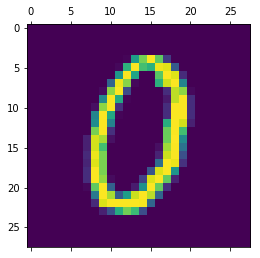

In [31]:
plt.matshow(x[5].reshape(28,28))

In [32]:
#target array has all 0 elements except for the one which it is which has highest value 
y.shape

(42000,)

In [33]:
target = []
for i in range(0,42000):
    real = np.zeros(10)
    real[y[i]]=0.99
    target.append(real)

In [34]:
target = np.array(target)


In [35]:
#make sure output is same as output array length and input to input 
target.shape, x.shape

# to avoid overflow when multiplying the array we scale the inputs 
x = ((x/255.0) * 0.99) + 0.01

In [36]:
#Training with samples and error rate 

for i in range(0,3):
    for j in range(0,420):
        nn.train(x[j],target[j])
        score = []
        for r in range(0,42000):
            asd = nn.query(x[r])
            abss = asd.tolist()
            rank = abss.index(max(abss))
            if rank == y[r]:
                score.append(1)
            else:
                score.append(0)
                
        accuracy = sum(score)/len(score)*100
        print('accuracy:', accuracy, 'sample: ',j, 'epoch: ', i)
            
            

inputs  (784, 1) 
 [[0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 

accuracy: 11.152380952380952 sample:  0 epoch:  0
inputs  (784, 1) 
 [[0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01 

accuracy: 11.152380952380952 sample:  1 epoch:  0
inputs  (784, 1) 
 [[0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01 

accuracy: 11.152380952380952 sample:  2 epoch:  0
inputs  (784, 1) 
 [[0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01 

accuracy: 11.152380952380952 sample:  3 epoch:  0
inputs  (784, 1) 
 [[0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01 

accuracy: 20.645238095238096 sample:  4 epoch:  0
inputs  (784, 1) 
 [[0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01 

accuracy: 9.838095238095237 sample:  5 epoch:  0
inputs  (784, 1) 
 [[0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01      ]
 [0.01  

KeyboardInterrupt: 

In [ ]:
plt.matshow(x[590].reshape(28,28))

In [99]:
ade= [1,0,1,0,1,0]
sum(ade)/len(ade)*100

50.0

In [144]:
score = []
for r in range(0,5):
    asd = nn.query(x[r])
    abss = asd.tolist()
    rank = abss.index(max(abss))
    if rank == y[r]:
        score.append(1)
    else:
        score.append(0)
    print(rank,asd, y[r])

0 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 1
0 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 0
0 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 1
0 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 4
0 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 0


In [142]:
rank

0